# Human Annotated NOTAM Analysis

Please note that the data for this analysis is saved locally in a `MatchingLaunchNOTAM_GMUCapstone_20220603` folder that is one level above (a parent folder) to where the [GitHub](https://github.com/DAEN-Team-1/Final "GitHub") files have been saved. This was done because a lot of the data files are too large to be included in the GitHub repoo.

In [1]:
# imports
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in data

In [2]:
# Read in csv (not enough headers for data, so using custom one)
names = ['LAUNCHES_REC_ID', 'NOTAM_REC_ID', 'LowerAltitude', 'UpperAltitude', 'IssueTime', 'StartTime', 'StopTime', 'E_CODE',
         '0_no_header', '1_no_header', '2_no_header', '3_no_header', '4_no_header', '5_no_header', '6_no_header', '7_no_header',
         '8_no_header', '9_no_header', '10_no_header', '11_no_header', '12_no_header', '13_no_header', '14_no_header']

df = pd.read_csv('data/HumanAnnotatedMatches_SVO_DB_20200127_pipes_noquotes.csv',
                 encoding='UTF-8', on_bad_lines='skip', engine="python", delimiter='|',
                 names=names)               

In [3]:
# Merge unlabeled columns
cmnt_names = ['0_no_header', '1_no_header', '2_no_header', '3_no_header', '4_no_header', '5_no_header', '6_no_header', '7_no_header',
              '8_no_header', '9_no_header', '10_no_header', '11_no_header', '12_no_header', '13_no_header', '14_no_header']

df['Text'] = df[cmnt_names].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Replace empyty strings with NaNs
df['Text'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.drop(cmnt_names, axis=1, inplace=True)

In [4]:
# Drop previous headers
df = df.drop(0)
df.reset_index(inplace=True, drop=True)

In [5]:
df.head()

,LAUNCHES_REC_ID,NOTAM_REC_ID,LowerAltitude,UpperAltitude,IssueTime,StartTime,StopTime,E_CODE,Text
0,391,848687,0,50000,2018-04-01 11:24:00,2018-04-02 18:22:00,2018-04-02 21:08:00,WARNING AREA W497A ACT,NaN
1,391,835580,0,180000,2018-03-28 09:47:00,2018-04-02 19:52:00,2018-04-02 21:08:00,FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...,NaN
2,391,835582,0,180000,2018-03-28 09:48:00,2018-04-02 19:52:00,2018-04-02 21:08:00,FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...,NaN
3,391,848685,0,180000,2018-03-28 09:48:00,2018-04-02 19:52:00,2018-04-02 21:08:00,CAPE CANAVERAL FL..TEMPORARY FLT RESTRICTION....,NaN
4,391,848684,0,180000,2018-03-28 09:50:00,2018-04-02 19:52:00,2018-04-02 21:08:00,TEMPORARY FLT RESTRICTION. PURSUANT TO 14 CFR...,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LAUNCHES_REC_ID  452 non-null    object 
 1   NOTAM_REC_ID     452 non-null    object 
 2   LowerAltitude    450 non-null    object 
 3   UpperAltitude    427 non-null    object 
 4   IssueTime        452 non-null    object 
 5   StartTime        452 non-null    object 
 6   StopTime         452 non-null    object 
 7   E_CODE           451 non-null    object 
 8   Text             0 non-null      float64
dtypes: float64(1), object(8)
memory usage: 31.9+ KB


In [7]:
df.describe()

,Text
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## Column Analysis

#### LAUNCHES_REC_ID
* Included in NOTAM Analysis CSV, but all values were NaN. 
* Repeats, but none cover more than 4% of the data. 

In [8]:
df['LAUNCHES_REC_ID']

0      391
1      391
2      391
3      391
4      391
      ... 
447    300
448    300
449    300
450    300
451    300
Name: LAUNCHES_REC_ID, Length: 452, dtype: object

In [9]:
df['LAUNCHES_REC_ID'].value_counts()

262    18
400    13
456    13
312    12
355    12
       ..
359     3
301     2
514     2
511     2
26      1
Name: LAUNCHES_REC_ID, Length: 63, dtype: int64

In [10]:
df['LAUNCHES_REC_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

262    0.03982
400    0.02876
456    0.02876
312    0.02655
355    0.02655
        ...   
359    0.00664
301    0.00442
514    0.00442
511    0.00442
26     0.00221
Name: LAUNCHES_REC_ID, Length: 63, dtype: object

#### NOTAM_REC_ID
* Included in NOTAM Analysis CSV
* Not all entries have some number of characters
* `388267` repeats 3x, while `83024` repeats 2x, all other values occur only once
* No NaNs

In [11]:
df['NOTAM_REC_ID']

0      848687
1      835580
2      835582
3      848685
4      848684
        ...  
447    317605
448    329275
449    329277
450    329276
451    323210
Name: NOTAM_REC_ID, Length: 452, dtype: object

In [12]:
df['NOTAM_REC_ID'].value_counts(dropna=False)

388267     3
83024      2
848687     1
84241      1
1036028    1
          ..
82303      1
82275      1
93347      1
93346      1
323210     1
Name: NOTAM_REC_ID, Length: 449, dtype: int64

#### LowerAltitude
* NOTAM Analysis CSV equivalent seems to be `MIN_ALT`
* Convert to floats
* Majority are 0.0, at 75%
    * Could this suggest ground based issues?
* Next 5 categories cover at least 1% of the data
* A couple of NaNs
* Repeats
* Includes chart

In [13]:
df['LowerAltitude'] = pd.to_numeric(df['LowerAltitude'])

In [14]:
df['LowerAltitude']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
447    50000.0
448        0.0
449        0.0
450        0.0
451        0.0
Name: LowerAltitude, Length: 452, dtype: float64

In [15]:
df['LowerAltitude'].value_counts(dropna=False)

0.0         341
50000.0      33
180000.0     31
5000.0       29
60000.0       5
2000.0        3
1000.0        3
NaN           2
90000.0       1
110000.0      1
80000.0       1
150000.0      1
70000.0       1
Name: LowerAltitude, dtype: int64

In [16]:
df['LowerAltitude'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0.0         0.75442
50000.0     0.07301
180000.0    0.06858
5000.0      0.06416
60000.0     0.01106
2000.0      0.00664
1000.0      0.00664
NaN         0.00442
90000.0     0.00221
110000.0    0.00221
80000.0     0.00221
150000.0    0.00221
70000.0     0.00221
Name: LowerAltitude, dtype: object

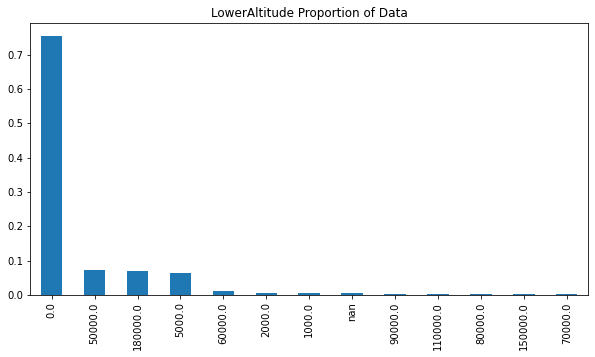

In [17]:
df['LowerAltitude'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                    title='LowerAltitude Proportion of Data',
                                                                    figsize=(10, 5));

#### UpperAltitude
* NOTAM Analysis CSV equivalent seems to be `MAX_ALT`
* Convert to floats
* Majority are `180000.0`, `999000.0`, `50000.0`, and `NaN`, covering 41%, 33%, 17%, and 6% of the data, respectively.
* No other category covers at least 1% of the data
* Repeats
* Includes chart

In [18]:
df['UpperAltitude'] = pd.to_numeric(df['UpperAltitude'])

In [19]:
df['UpperAltitude']

0       50000.0
1      180000.0
2      180000.0
3      180000.0
4      180000.0
         ...   
447    510000.0
448     20000.0
449     10000.0
450     10000.0
451    999000.0
Name: UpperAltitude, Length: 452, dtype: float64

In [20]:
df['UpperAltitude'].value_counts(dropna=False)

180000.0    184
999000.0    149
50000.0      75
NaN          25
500000.0      3
69990.0       2
109990.0      2
35000.0       2
79000.0       2
10000.0       2
800000.0      1
149990.0      1
90000.0       1
70000.0       1
510000.0      1
20000.0       1
Name: UpperAltitude, dtype: int64

In [21]:
df['UpperAltitude'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

180000.0    0.40708
999000.0    0.32965
50000.0     0.16593
NaN         0.05531
500000.0    0.00664
69990.0     0.00442
109990.0    0.00442
35000.0     0.00442
79000.0     0.00442
10000.0     0.00442
800000.0    0.00221
149990.0    0.00221
90000.0     0.00221
70000.0     0.00221
510000.0    0.00221
20000.0     0.00221
Name: UpperAltitude, dtype: object

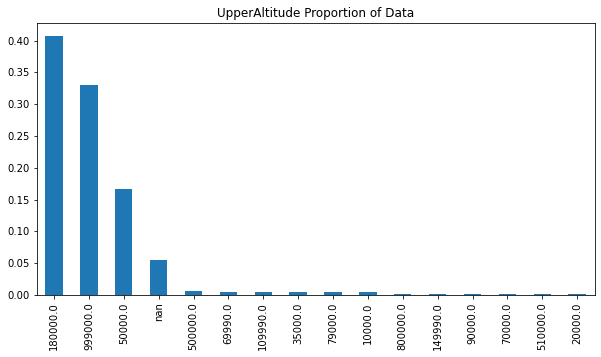

In [22]:
df['UpperAltitude'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                    title='UpperAltitude Proportion of Data',
                                                                    figsize=(10, 5));

#### IssueTime
* NOTAM Analysis CSV equivalent seems to be `ISSUE_DATE`
* Did not get parsed as dates.
    * Parsed through custom fuction
* All entries from 2016-2020
* Includes chart

In [23]:
from datetime import datetime
def convert_to_date(row):
    try:
        return datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    except:
        return row
    
def get_year(row):
    try:
        return row.year
    except:
        return row

def get_month(row):
    try:
        return row.month
    except:
        return row
    
def get_day(row):
    try:
        return row.day
    except:
        return row

In [24]:
df['IssueTime'] = df['IssueTime'].apply(convert_to_date)

In [25]:
df['IssueTime'].value_counts(dropna=False)

2016-08-16 12:03:00    7
2019-04-11 09:02:00    5
2019-04-10 15:02:00    4
2017-10-10 15:51:00    3
2019-07-24 12:54:00    3
                      ..
2019-06-09 03:29:00    1
2019-02-19 10:28:00    1
2019-02-19 10:29:00    1
2019-07-24 08:12:00    1
2017-03-01 08:31:00    1
Name: IssueTime, Length: 338, dtype: int64

In [26]:
df['IssueTime'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2016-08-16 12:03:00    0.01549
2019-04-11 09:02:00    0.01106
2019-04-10 15:02:00    0.00885
2017-10-10 15:51:00    0.00664
2019-07-24 12:54:00    0.00664
                        ...   
2019-06-09 03:29:00    0.00221
2019-02-19 10:28:00    0.00221
2019-02-19 10:29:00    0.00221
2019-07-24 08:12:00    0.00221
2017-03-01 08:31:00    0.00221
Name: IssueTime, Length: 338, dtype: object

In [27]:
df['IssueTime_YEAR']  = df['IssueTime'].apply(get_year)
df['IssueTime_MONTH'] = df['IssueTime'].apply(get_month)
df['IssueTime_DAY']   = df['IssueTime'].apply(get_day)

In [28]:
df['IssueTime_YEAR'] 

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
447    2017
448    2017
449    2017
450    2017
451    2017
Name: IssueTime_YEAR, Length: 452, dtype: int64

In [29]:
df['IssueTime_YEAR'].value_counts(dropna=False)

2018    160
2017    127
2016     74
2019     72
2020     19
Name: IssueTime_YEAR, dtype: int64

In [30]:
df['IssueTime_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018    0.35398
2017    0.28097
2016    0.16372
2019    0.15929
2020    0.04204
Name: IssueTime_YEAR, dtype: object

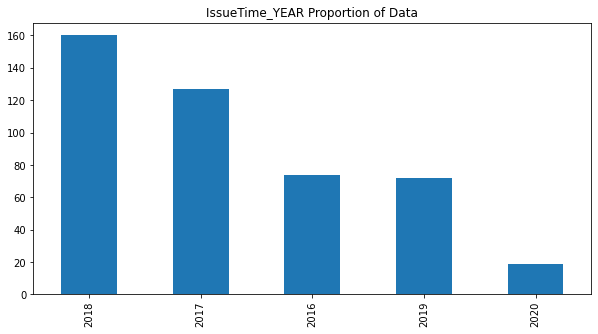

In [31]:
df['IssueTime_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                     title='IssueTime_YEAR Proportion of Data',
                                                     figsize=(10, 5));

#### StartTime
* NOTAM Analysis CSV equivalent seems to be `POSSIBLE_START_DATE`
* Did not get parsed as dates.
    * Parsed through custom fuction
* All entries from 2016-2020
* Includes chart

In [32]:
df['StartTime'] = df['StartTime'].apply(convert_to_date)

In [33]:
df['StartTime'].value_counts(dropna=False)

2019-04-11 22:01:00    11
2018-06-29 09:03:00     8
2017-03-01 16:30:00     7
2016-08-17 01:01:00     7
2018-05-21 08:15:00     6
                       ..
2020-03-07 02:45:00     1
2018-10-08 02:06:00     1
2020-05-30 17:11:00     1
2016-05-06 03:16:00     1
2018-04-02 18:22:00     1
Name: StartTime, Length: 133, dtype: int64

In [34]:
df['StartTime'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2019-04-11 22:01:00    0.02434
2018-06-29 09:03:00    0.01770
2017-03-01 16:30:00    0.01549
2016-08-17 01:01:00    0.01549
2018-05-21 08:15:00    0.01327
                        ...   
2020-03-07 02:45:00    0.00221
2018-10-08 02:06:00    0.00221
2020-05-30 17:11:00    0.00221
2016-05-06 03:16:00    0.00221
2018-04-02 18:22:00    0.00221
Name: StartTime, Length: 133, dtype: object

In [35]:
df['StartTime_YEAR']  = df['StartTime'].apply(get_year)
df['StartTime_MONTH'] = df['StartTime'].apply(get_month)
df['StartTime_DAY']   = df['StartTime'].apply(get_day)

In [36]:
df['StartTime_YEAR'] 

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
447    2017
448    2017
449    2017
450    2017
451    2017
Name: StartTime_YEAR, Length: 452, dtype: object

In [37]:
df['StartTime_YEAR'].value_counts(dropna=False)

2018                                       159
2017                                       127
2016                                        74
2019                                        72
2020                                        19
2018-05-11 18:09:00,2018-05-11 23:13:00      1
Name: StartTime_YEAR, dtype: int64

In [38]:
df['StartTime_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018                                       0.35177
2017                                       0.28097
2016                                       0.16372
2019                                       0.15929
2020                                       0.04204
2018-05-11 18:09:00,2018-05-11 23:13:00    0.00221
Name: StartTime_YEAR, dtype: object

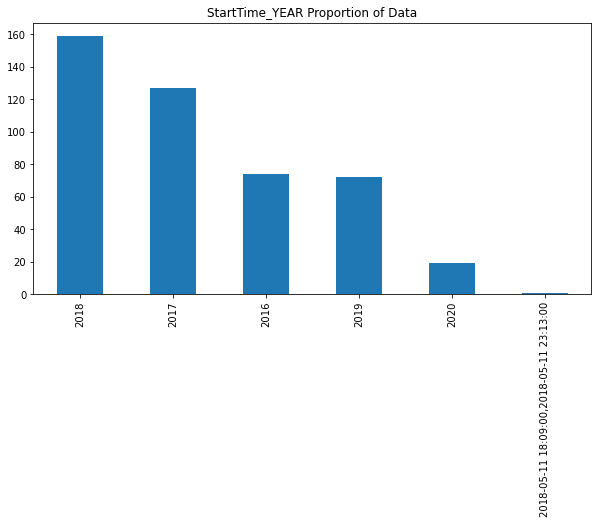

In [39]:
df['StartTime_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                     title='StartTime_YEAR Proportion of Data',
                                                     figsize=(10, 5));